# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
import dendrotweaks as dd

/home/roman/Documents/code/DendroTweaks/app/src


# Model from swc

In [3]:
model = dd.Model(name='Park_2019', path_to_data='data/')

In [4]:
model.info()

Model: Park_2019
Path to data: data/
Simulator: NEURON
Groups: 0
Mechanisms: 0
Parameters: 0
IClamps: 0
Synapses: 0


In [5]:
file_name = 'Park_2019.swc'
# file_name = 'ball-and-stick.swc'
model.from_swc(file_name)

Building SWC tree...
Connecting tree.
Postprocessing SWC tree...
  Sorting tree...
  Elapsed time: 0.0 seconds
Splitting tree to sections...
  Elapsed time: 0.0 seconds
Merging soma into a single section...
Shifting coordinates to soma center...
Extending tree...
SWC tree validation passed successfully
    is connected: 1
    is sorted:    1
    is sectioned: 1
    is extended:  1
Building SEC tree...
Connecting tree.
SEC tree validation passed successfully.
    is connected: 1
    is sorted:    1


In [6]:
model.sec_tree.topology()

parent |   idx
---------------
    -1 |   •0
     0 |   ├─•1
     0 |   ├─•2
     0 |   ├─•3
     0 |   ├─•4
     0 |   ├─•5
     5 |   │ ├─•6
     5 |   │ └─•7
     0 |   ├─•8
     0 |   └─•9
     9 |     ├─•10
    10 |     │ ├─•11
    11 |     │ │ ├─•12
    12 |     │ │ │ ├─•13
    13 |     │ │ │ │ ├─•14
    14 |     │ │ │ │ │ ├─•15
    15 |     │ │ │ │ │ │ ├─•16
    15 |     │ │ │ │ │ │ └─•17
    14 |     │ │ │ │ │ └─•18
    13 |     │ │ │ │ └─•19
    19 |     │ │ │ │   ├─•20
    20 |     │ │ │ │   │ ├─•21
    20 |     │ │ │ │   │ └─•22
    19 |     │ │ │ │   └─•23
    23 |     │ │ │ │     ├─•24
    23 |     │ │ │ │     └─•25
    12 |     │ │ │ └─•26
    11 |     │ │ └─•27
    27 |     │ │   ├─•28
    27 |     │ │   └─•29
    10 |     │ └─•30
    30 |     │   ├─•31
    31 |     │   │ ├─•32
    32 |     │   │ │ ├─•33
    32 |     │   │ │ └─•34
    34 |     │   │ │   ├─•35
    34 |     │   │ │   └─•36
    31 |     │   │ └─•37
    30 |     │   └─•38
    38 |     │     ├─•39
    39 |   

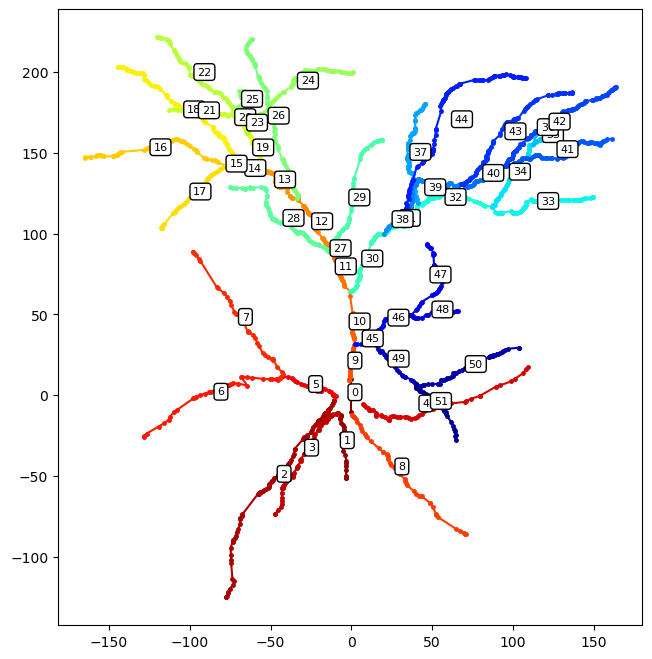

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))
model.sec_tree.plot_sections(ax, 
                             show_points=True,
                             show_lines=True,
                             annotate=True)

# NEURON Sections

In [8]:
print(model.simulator_name)
model.create_and_reference_sections_in_simulator()

NEURON
Building sections in NEURON...
52 sections created.


In [9]:
sec = model.sec_tree.sections[10]
print(sec)
sec._ref.nseg = 100

••10


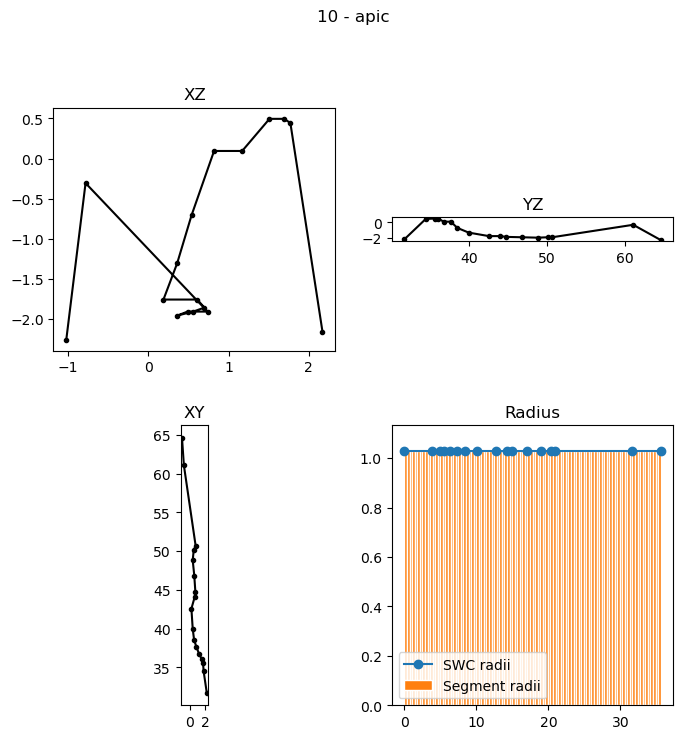

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
sec.plot_pts3d(ax);

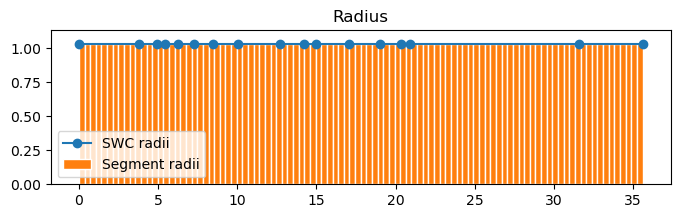

In [11]:
fig, ax = plt.subplots(figsize=(8, 2))
sec.plot_radii(ax);

In [12]:
sec.pts3d[0].distance_to_root, sec.distance_to_root(0)

(37.09536307051592, 37.09536307051592)

# Add mechanisms

In [13]:
model.add_archive('Base')
model.add_archive('Park_test')

Replacing SUFFIX Leak with SUFFIX Leak
Saved changes to data/mod/Base/Leak.mod
Loaded mechanisms from "data/mod/Base"
Mechanism Leak added to model.
Replacing SUFFIX Na with SUFFIX Na
Saved changes to data/mod/Park_test/Na.mod
Replacing SUFFIX Kv with SUFFIX Kv
Saved changes to data/mod/Park_test/Kv.mod
Loaded mechanisms from "data/mod/Park_test"
Saved content to data/collection/Park_test/Na.py
Module name: data.collection.Park_test.Na
data.collection.Park_test.Na
Mechanism Na added to model.
Saved content to data/collection/Park_test/Kv.py
Module name: data.collection.Park_test.Kv
data.collection.Park_test.Kv
Mechanism Kv added to model.


In [14]:
model.mechanisms

{'Leak': Mechanism(Leak) with parameters: {'gbar_Leak': 0.0001},
 'Na': Mechanism(Na) with parameters: {'gbar_Na': 0.0, 'Rma_Na': 0.182, 'Rmb_Na': 0.14, 'v12m_Na': -30, 'qm_Na': 9.8, 'Rhb_Na': 0.0091, 'Rha_Na': 0.024, 'v12ha_Na': -45, 'v12hb_Na': -70, 'qh_Na': 5, 'v12hinf_Na': -60, 'qhinf_Na': 6.2},
 'Kv': Mechanism(Kv) with parameters: {'gbar_Kv': 0.0, 'v12_Kv': 25, 'q_Kv': 9}}

In [15]:
model.parameters_to_groups

{}

# Groups

In [16]:
all_group = dd.Group(name='all', nodes=model.sec_tree.sections)

  Elapsed time: 0.01 seconds
  Elapsed time: 0.01 seconds


In [17]:
model._add_group(all_group)

In [18]:
model.groups['all'].parameters

{'cm': uniform({'value': 1}), 'Ra': uniform({'value': 100})}

In [19]:
model.mechanisms

{'Leak': Mechanism(Leak) with parameters: {'gbar_Leak': 0.0001},
 'Na': Mechanism(Na) with parameters: {'gbar_Na': 0.0, 'Rma_Na': 0.182, 'Rmb_Na': 0.14, 'v12m_Na': -30, 'qm_Na': 9.8, 'Rhb_Na': 0.0091, 'Rha_Na': 0.024, 'v12ha_Na': -45, 'v12hb_Na': -70, 'qh_Na': 5, 'v12hinf_Na': -60, 'qhinf_Na': 6.2},
 'Kv': Mechanism(Kv) with parameters: {'gbar_Kv': 0.0, 'v12_Kv': 25, 'q_Kv': 9}}

In [20]:
model.groups['all'].parameters

{'cm': uniform({'value': 1}), 'Ra': uniform({'value': 100})}

In [22]:
model.parameters_to_groups

{'cm': ['all'], 'Ra': ['all']}

In [ ]:
print(json.dumps(all_group.to_dict(), indent=4))

{
    "group": {
        "name": "all",
        "nodes": [
            0,
            1,
            2,
            3,
            4,
            5,
            6,
            7,
            8,
            9,
            10,
            11,
            12,
            13,
            14,
            15,
            16,
            17,
            18,
            19,
            20,
            21,
            22,
            23,
            24,
            25,
            26,
            27,
            28,
            29,
            30,
            31,
            32,
            33,
            34,
            35,
            36,
            37,
            38,
            39,
            40,
            41,
            42,
            43,
            44,
            45,
            46,
            47,
            48,
            49,
            50,
            51
        ],
        "mechanisms": [],
        "parameters": [
            {
                "name": "cm",
               

In [22]:
model.info()

Model: Park_2019
Path to data: data/
Simulator: NEURON
Groups: 1
Mechanisms: 3
Parameters: 2
IClamps: 0
Synapses: 0


In [23]:
model.groups

OrderedDict([('all',
              Group(all) with 52 nodes
              Parameters: ['cm', 'Ra'])])

In [ ]:
# func = ParametrizedFunction(function_name='linear', 
#                             parameters={'slope': 1, 'intercept': 0})
# all_group.replace_distribution_function('cm', func)

In [ ]:
# new_parameters = {'slope': 1, 'intercept': 10}
# all_group.update_distribution_function_parameters('cm', **new_parameters)

In [24]:
model.sec_tree.sections[10]._ref.cm

1.0

In [29]:
model.sec_tree.soma

••0

- ✔ Groups
- ✔ Segment graph
- Insert mechanisms

In [ ]:
# Section diam in NEURON
sec._ref.diam

2.059999942779532

In [ ]:
# diam of each segment in NEURON
seg_diams = np.array([seg.diam for seg in sec._ref])
print(f'{seg_diams.size} segments with diam {seg_diams.mean()}')

100 segments with diam 2.05999994277954


In [ ]:
# diam of each pt3d in neuron
pts3d_diams = np.array([sec._ref.diam3d(i) for i in range(sec._ref.n3d())])
print(f'{pts3d_diams.size} pt3d with diam {pts3d_diams.mean()}')

17 pt3d with diam 2.059999942779541


In [ ]:
# diam of each pt3d in custom section
swc_diams = np.array([pt.r*2 for pt in sec.pts3d])
print(f'{swc_diams.size} pt3d with diam {swc_diams.mean()}')

17 pt3d with diam 2.06


In [ ]:
# from core.utils import calculate_lambda_f
# from neuron import h
# h.load_file('stdrun.hoc')
# f = 100
# for sec in model.sec_tree.sections:
#     neuron_sec = sec._ref
#     # diam = neuron_sec.diam
#     diam = np.array([seg.diam for seg in sec._ref]).mean()
#     lambda_f = calculate_lambda_f(diam, neuron_sec.Ra, neuron_sec.cm)
#     lambda_f_neuron = h.lambda_f(f, sec=neuron_sec)
#     nseg = int((neuron_sec.L / (0.1 * lambda_f) + 0.9) / 2) * 2 + 1
#     # print(f'Section {sec.idx} has {nseg} segments with lambda_f = {lambda_f:.5f} um')
#     nseg_neuron = int((neuron_sec.L / (0.1 * lambda_f_neuron) + 0.9) / 2) * 2 + 1
#     # print(f'Section {sec.idx} has {nseg} segments with lambda_f = {lambda_f_neuron:.5f} um')
#     # print(f'Neuron lambda_f = {lambda_f_neuron:.5f} um, calculated lambda_f = {lambda_f:.5f} um')
#     print(f'Neuron nseg = {nseg_neuron}, calculated nseg = {nseg}')

# Segmentation

In [30]:
model.set_geom_nseg(d_lambda=0.1, f=100)

Text(0.5, 1.0, 'Correspondence between nseg and length')

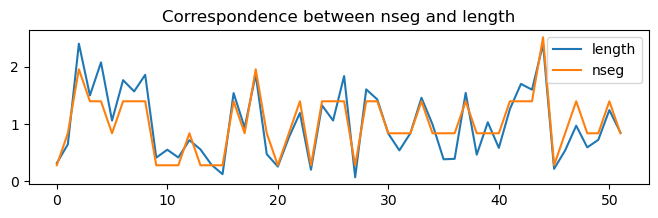

In [31]:
fig, ax = plt.subplots(figsize=(8, 2))
sec_ids = np.array([sec.idx for sec in model.sec_tree.sections])
sec_nseg = np.array([sec._ref.nseg for sec in model.sec_tree.sections])
sec_diams = np.array([np.array([seg.diam for seg in sec._ref]).mean() for sec in model.sec_tree.sections])
# sec_cm = np.array([sec._ref.cm for sec in model.sec_tree.sections])
# sec_Ra = np.array([sec._ref.Ra for sec in model.sec_tree.sections])
sec_lenghts = np.array([sec._ref.L for sec in model.sec_tree.sections])
# draw a vertical line between nseg and length datapoints for each section

sec_nseg = sec_nseg / sec_nseg.mean()
sec_lenghts = sec_lenghts / sec_lenghts.mean()

ys = sec_nseg - sec_lenghts

# ax.vlines(sec_ids, sec_nseg, sec_lenghts, color='k', label='nseg')
ax.plot(sec_ids, sec_lenghts, '-', label='length')
ax.plot(sec_ids, sec_nseg, '-', label='nseg')
# ax.stem(sec_ids, ys, use_line_collection=True)
ax.legend()
ax.set_title('Correspondence between nseg and length')

In [32]:
for sec in model.sec_tree.sections:
    print(f'Section {sec.idx} has {sec._ref.nseg} segments')

Section 0 has 1 segments
Section 1 has 3 segments
Section 2 has 7 segments
Section 3 has 5 segments
Section 4 has 5 segments
Section 5 has 3 segments
Section 6 has 5 segments
Section 7 has 5 segments
Section 8 has 5 segments
Section 9 has 1 segments
Section 10 has 1 segments
Section 11 has 1 segments
Section 12 has 3 segments
Section 13 has 1 segments
Section 14 has 1 segments
Section 15 has 1 segments
Section 16 has 5 segments
Section 17 has 3 segments
Section 18 has 7 segments
Section 19 has 3 segments
Section 20 has 1 segments
Section 21 has 3 segments
Section 22 has 5 segments
Section 23 has 1 segments
Section 24 has 5 segments
Section 25 has 5 segments
Section 26 has 5 segments
Section 27 has 1 segments
Section 28 has 5 segments
Section 29 has 5 segments
Section 30 has 3 segments
Section 31 has 3 segments
Section 32 has 3 segments
Section 33 has 5 segments
Section 34 has 3 segments
Section 35 has 3 segments
Section 36 has 3 segments
Section 37 has 5 segments
Section 38 has 3 segme

In [33]:
model.build_seg_tree()

Building SEG tree...
Connecting tree.


In [34]:
model.seg_tree.is_sorted

True

In [35]:
model.seg_tree.topology()

parent |   idx
---------------
    -1 |   •0
     0 |   ├─•1
     1 |   │ └─•2
     2 |   │   └─•3
     0 |   ├─•4
     4 |   │ └─•5
     5 |   │   └─•6
     6 |   │     └─•7
     7 |   │       └─•8
     8 |   │         └─•9
     9 |   │           └─•10
     0 |   ├─•11
    11 |   │ └─•12
    12 |   │   └─•13
    13 |   │     └─•14
    14 |   │       └─•15
     0 |   ├─•16
    16 |   │ └─•17
    17 |   │   └─•18
    18 |   │     └─•19
    19 |   │       └─•20
     0 |   ├─•21
    21 |   │ └─•22
    22 |   │   └─•23
    23 |   │     ├─•24
    24 |   │     │ └─•25
    25 |   │     │   └─•26
    26 |   │     │     └─•27
    27 |   │     │       └─•28
    23 |   │     └─•29
    29 |   │       └─•30
    30 |   │         └─•31
    31 |   │           └─•32
    32 |   │             └─•33
     0 |   ├─•34
    34 |   │ └─•35
    35 |   │   └─•36
    36 |   │     └─•37
    37 |   │       └─•38
     0 |   └─•39
    39 |     ├─•40
    40 |     │ ├─•41
    41 |     │ │ ├─•42
    42 |     │ │ │ └─•43

In [36]:
model.sec_tree.soma.pts3d

[•1, •0, •2]

In [37]:
model.sec_tree.soma.distances

[0.0, 10.21896239, 20.43792478]

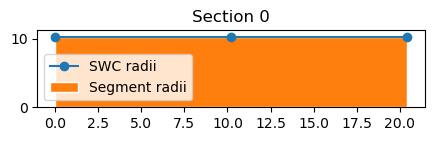

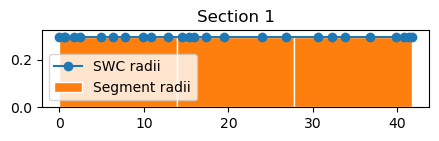

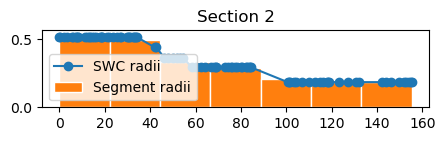

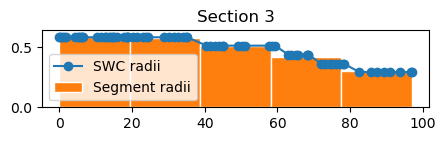

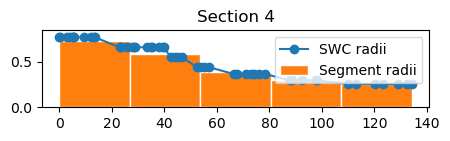

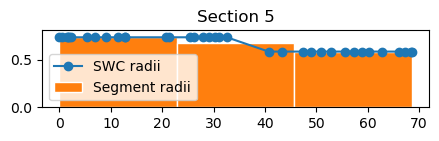

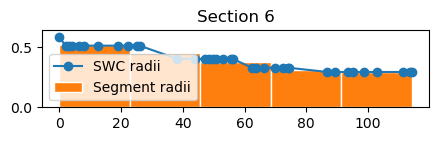

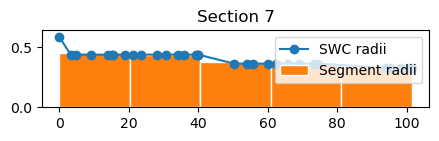

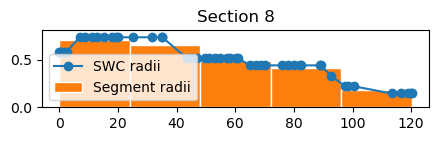

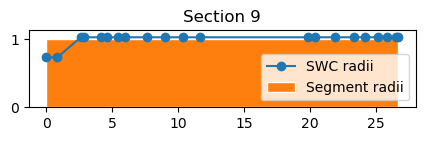

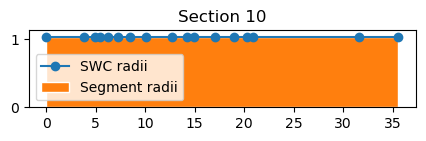

In [38]:
for sec in model.sec_tree.sections:
        fig, ax = plt.subplots(figsize=(5, 1))
        sec.plot_radii(ax)
        ax.set_title(f'Section {sec.idx}')
        if sec.idx >= 10:
            break

In [39]:
model.sec_tree[44]._ref.cm

1.0

In [40]:
len(model.seg_tree)

186

# Mechanisms

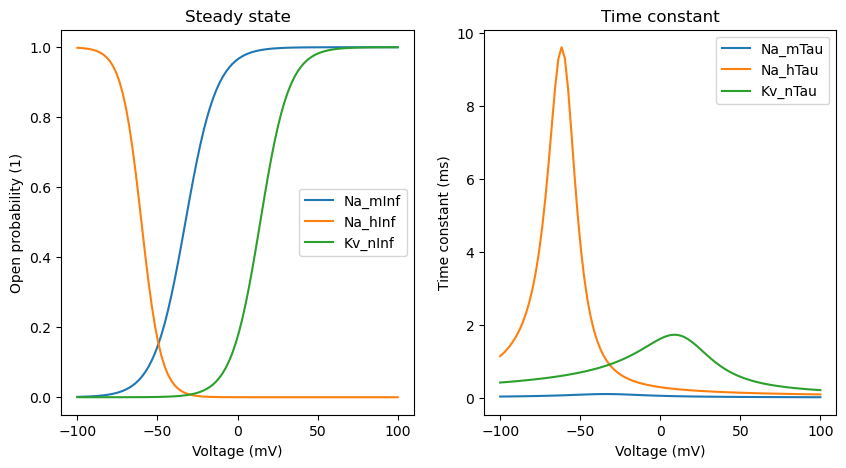

In [41]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
model.mechanisms['Na'].plot_kinetic_variables(ax)
model.mechanisms['Kv'].plot_kinetic_variables(ax)

In [42]:
model.groups

{'all': Group(all) with 52 nodes
 Parameters: ['cm', 'Ra', 'gbar_Leak', 'gbar_Na', 'Rma_Na', 'Rmb_Na', 'v12m_Na', 'qm_Na', 'Rhb_Na', 'Rha_Na', 'v12ha_Na', 'v12hb_Na', 'qh_Na', 'v12hinf_Na', 'qhinf_Na', 'gbar_Kv', 'v12_Kv', 'q_Kv']}

In [44]:
model.groups['all'].to_dict()

{'group': {'name': 'all',
  'nodes': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51],
  'parameters': [{'name': 'cm',
    'distribution_function': {'function': 'uniform',
     'parameters': {'value': 1}}},
   {'name': 'Ra',
    'distribution_function': {'function': 'uniform',
     'parameters': {'value': 100}}},
   {'name': 'gbar_Leak',
    'distribution_function': {'function': 'uniform',
     'parameters': {'value': 0.0001}}},
   {'name': 'gbar_Na',
    'distribution_function': {'function': 'uniform',
     'parameters': {'value': 0.0}}},
   {'name': 'Rma_Na',
    'distribution_function': {'function': 'uniform',
     'parameters': {'value': 0.182}}},
   {'name': 'Rmb_Na',
    'distributi

In [46]:
model.groups['all'].update_distribution_parameters('gbar_Na', value=0.05)
model.groups['all'].update_distribution_parameters('gbar_Kv', value=0.005)

  Elapsed time: 0.01 seconds
  Elapsed time: 0.01 seconds


# Simulate

In [47]:
seg = model.seg_tree[0]
model.simulator.add_recording(seg)

In [52]:
model.add_iclamp(seg, amp=0.1, delay=100, dur=100)

IClamp added to segment •0


In [51]:
model.remove_all_iclamps()

In [53]:
t, v, _ = model.simulator.run(duration=300)

(-100.0, 60.0)

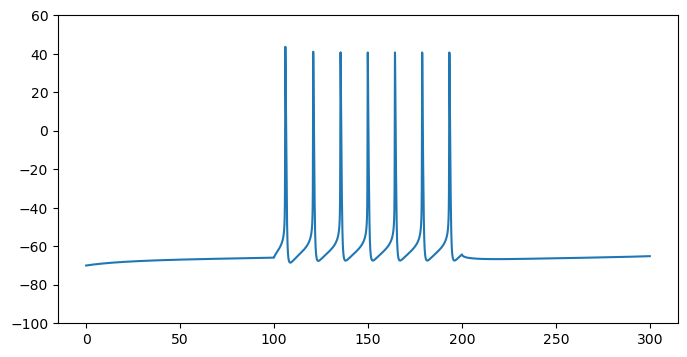

In [54]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t[0], v[0])
ax.set_ylim(-100, 60)

# Synapses

In [ ]:
pop = dd.Population(name='all', sections=model.sec_tree._nodes, N=50, syn_type='Exp2Syn')

In [ ]:
pop.assign_sec_and_loc()

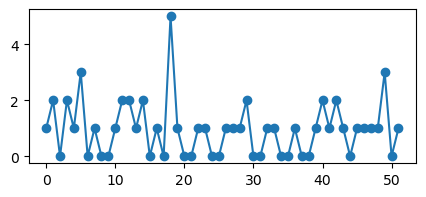

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2))
# histogram of synapse N per secton (pop.n_per_sec)
plt.plot([v for k,v in pop.n_per_sec.items()], 'o-');

In [ ]:
# pop.create_and_reference()

In [ ]:
print(json.dumps(pop.to_dict(), indent=4))

{
    "population": {
        "name": "all",
        "input_params": {
            "rate": 1,
            "noise": 1,
            "start": 100,
            "end": 200,
            "weight": 1,
            "delay": 0
        },
        "kinetic_params": {
            "gmax": 0.001,
            "tau_rise": 0.2,
            "tau_decay": 1.4,
            "e": 0,
            "gamma": 0.062,
            "mu": 0.28
        },
        "syn_type": "Exp2Syn",
        "synapses": [
            {
                "sec_idx": 0,
                "locs": [
                    0.63
                ]
            },
            {
                "sec_idx": 1,
                "locs": [
                    0.61,
                    0.25
                ]
            },
            {
                "sec_idx": 3,
                "locs": [
                    1.0,
                    0.22
                ]
            },
            {
                "sec_idx": 4,
                "locs": [
                   